Подключение гугл диска для гугл колаба (надо опробовать)
# Подключение GoogleДиска
from google.colab import drive<br>
drive.mount('/content/gdrive', force_remount=True)

## Задание 1.
- Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
- Считать данные с помощью pandas
- Вывести на экран первые 5 строк
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы
### 1.1 Изучите количество памяти с помощью matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptops_10.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


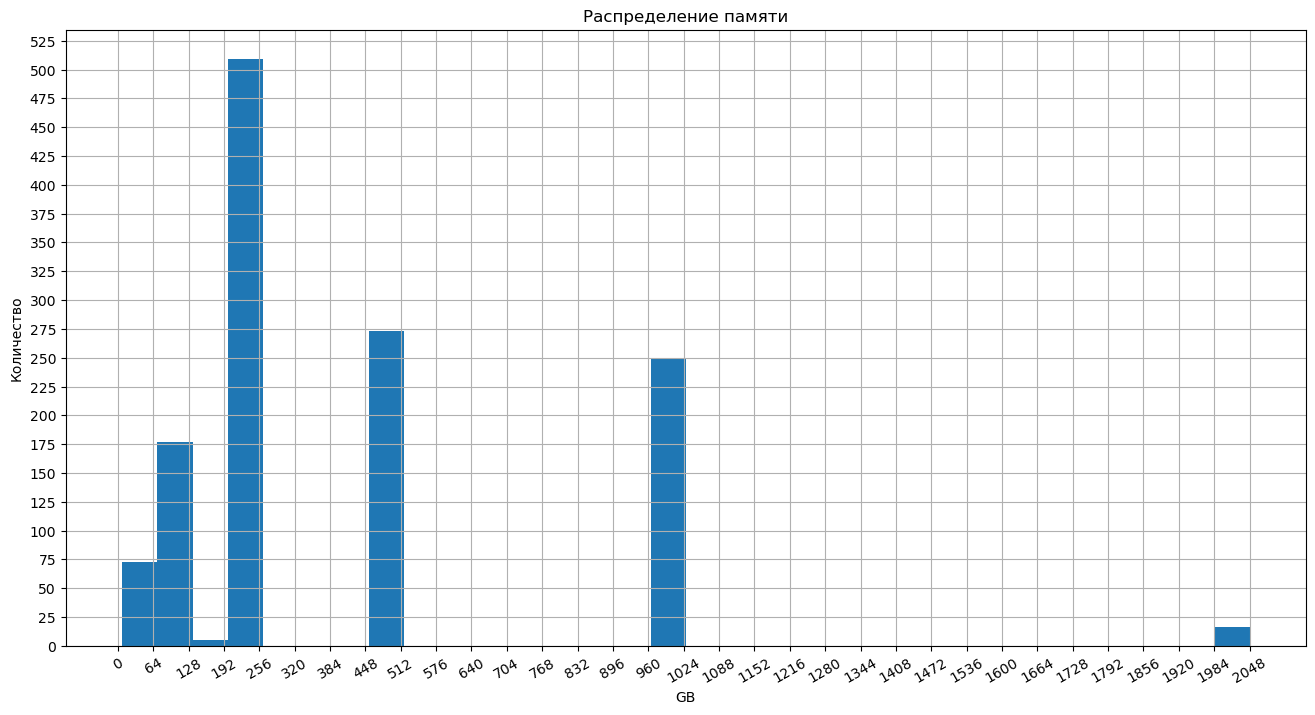

In [4]:
plt.figure(figsize=(16, 8))
plt.hist(df['Memory_Amount'], bins = 32)
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество')
plt.xticks(range(0, 2100, 64), rotation=30)
plt.yticks(range(0, 550, 25))
plt.grid();

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

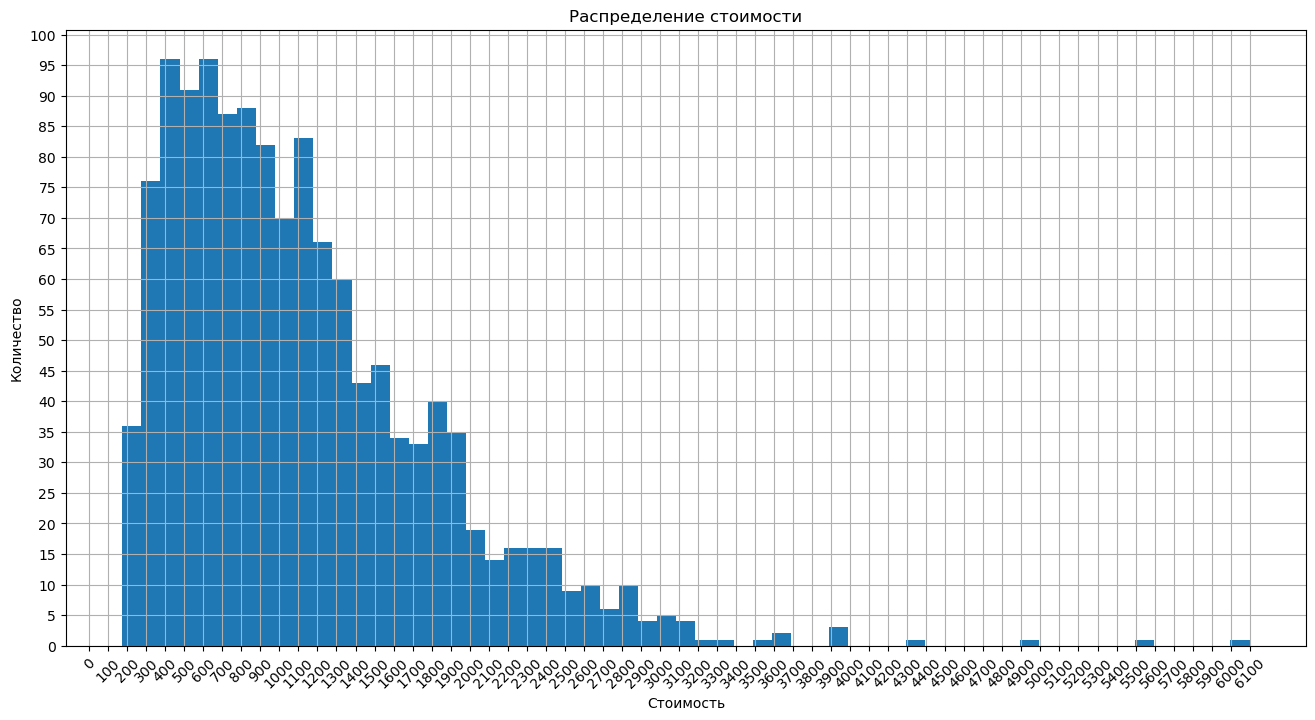

In [5]:
plt.figure(figsize=(16, 8))
plt.hist(df['Price_euros'], bins = 59)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.xticks(range(0, 6200, 100), rotation=45)
plt.yticks(range(0, 105, 5))
plt.grid();

### 1.3 Изучите вес ноутбуков с помощью matplotlib

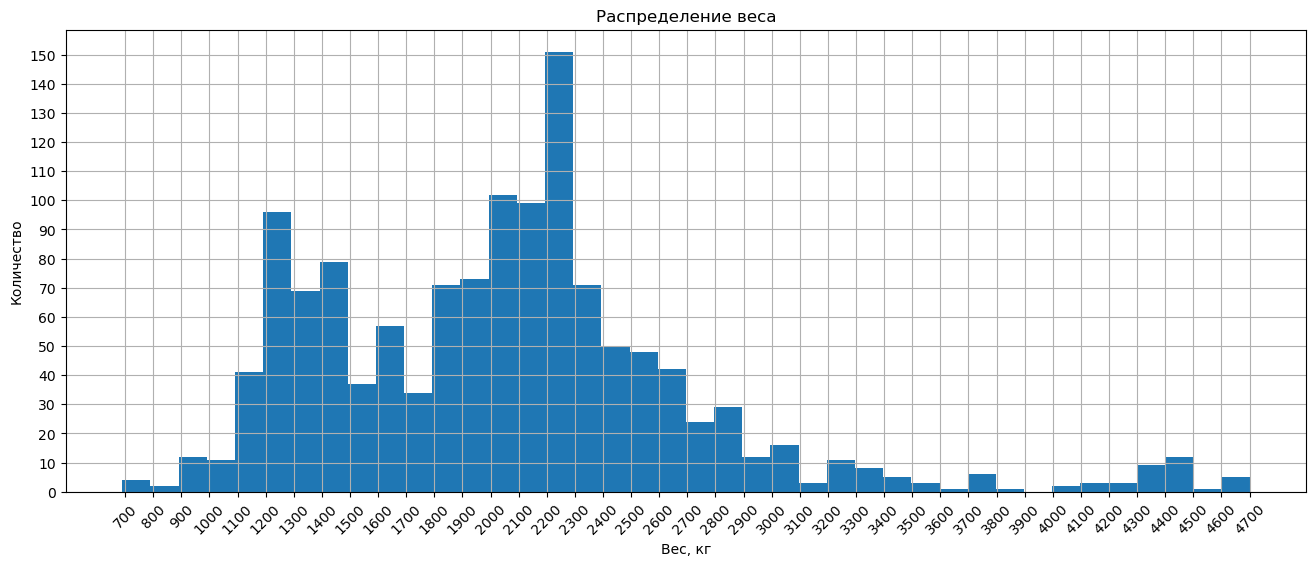

In [6]:
plt.figure(figsize=(16, 6))
plt.hist(df['Weight'], bins = 40)
plt.title('Распределение веса')
plt.xlabel('Вес, кг')
plt.ylabel('Количество')
plt.xticks(np.arange(0.7, 4.8, 0.1), range(700, 4800, 100), rotation=45)
plt.yticks(range(0, 160, 10))
plt.grid();

## Задание 2.
- Постройте график
- Сделайте выводы
### 2.1 Изучите распределение типов носителя

In [7]:
mem_type = df['Memory_Type'].value_counts()

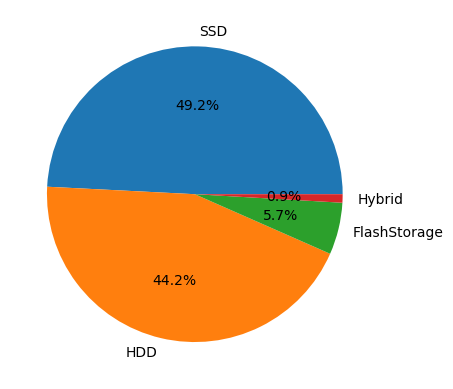

In [8]:
plt.pie(mem_type.values, labels=mem_type.index, autopct='%.1f%%');

### 2.2 Изучите распределение компаний производителей

In [9]:
company = df['Company'].value_counts()
company

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

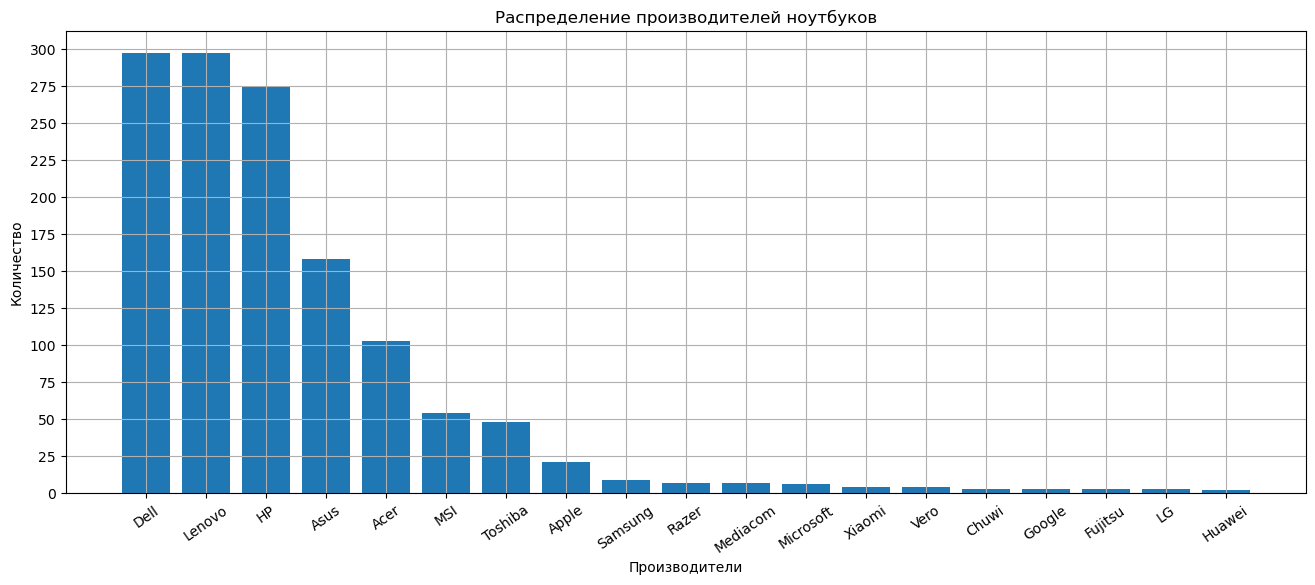

In [10]:
plt.figure(figsize=(16, 6))
plt.title('Распределение производителей ноутбуков')
plt.xlabel('Производители')
plt.ylabel('Количество')
plt.xticks(rotation=35)
plt.yticks(range(0, 310, 25))
plt.grid()
plt.bar(company.index, company);

### 2.3 Изучите распределение операционной системы

In [11]:
opsys_count = df['OpSys'].value_counts()
opsys_count

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

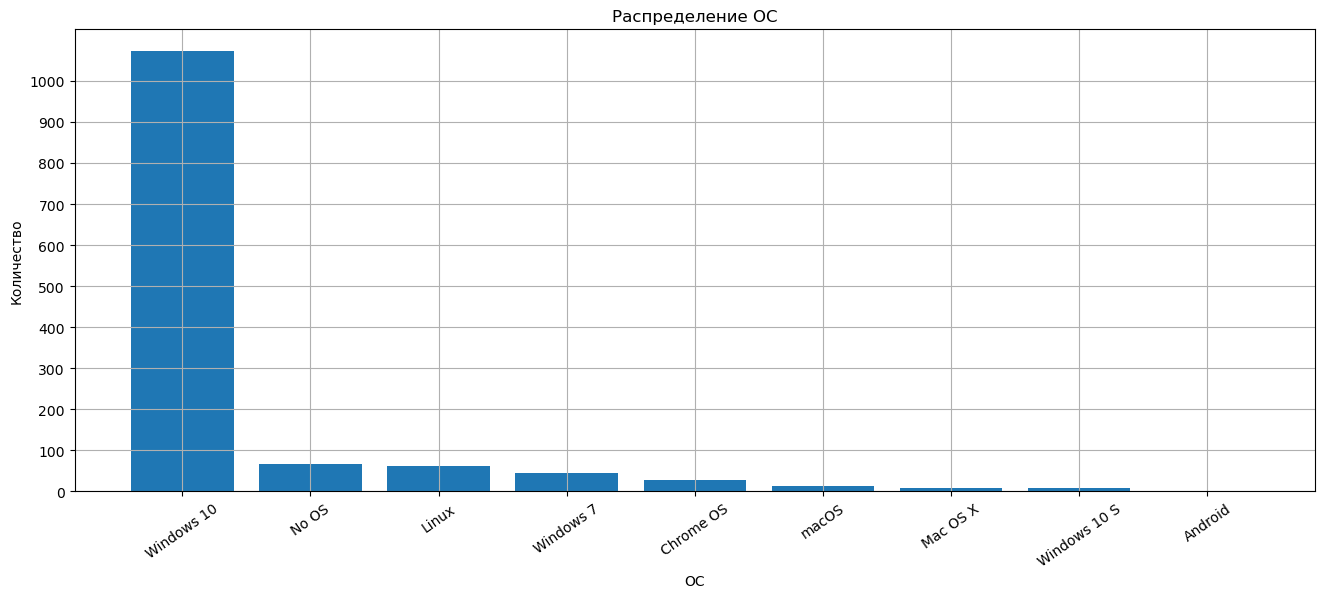

In [12]:
plt.figure(figsize=(16, 6))
plt.title('Распределение ОС')
plt.xlabel('ОС')
plt.ylabel('Количество')
plt.xticks(rotation=35)
plt.yticks(range(0, 1100, 100))
plt.grid()
plt.bar(opsys_count.index, opsys_count);

### 2.4 Изучите распределение компаний производителей CPU

In [13]:
cpu_count = df['Cpu_Company'].value_counts()
cpu_count

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

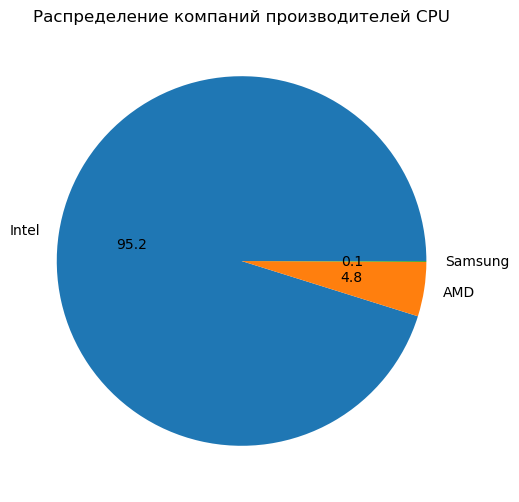

In [14]:
plt.figure(figsize=(16, 6))
plt.title('Распределение компаний производителей CPU')
plt.pie(cpu_count, labels=cpu_count.index, autopct='%.1f');

## Задание 3.
- Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму.
- Процессоры от Samsung не изучайте.
### 3.1 Постройте график в абсолютных величинах

In [15]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company']).reset_index()
data.drop(columns=['Samsung'], inplace = True)
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


''

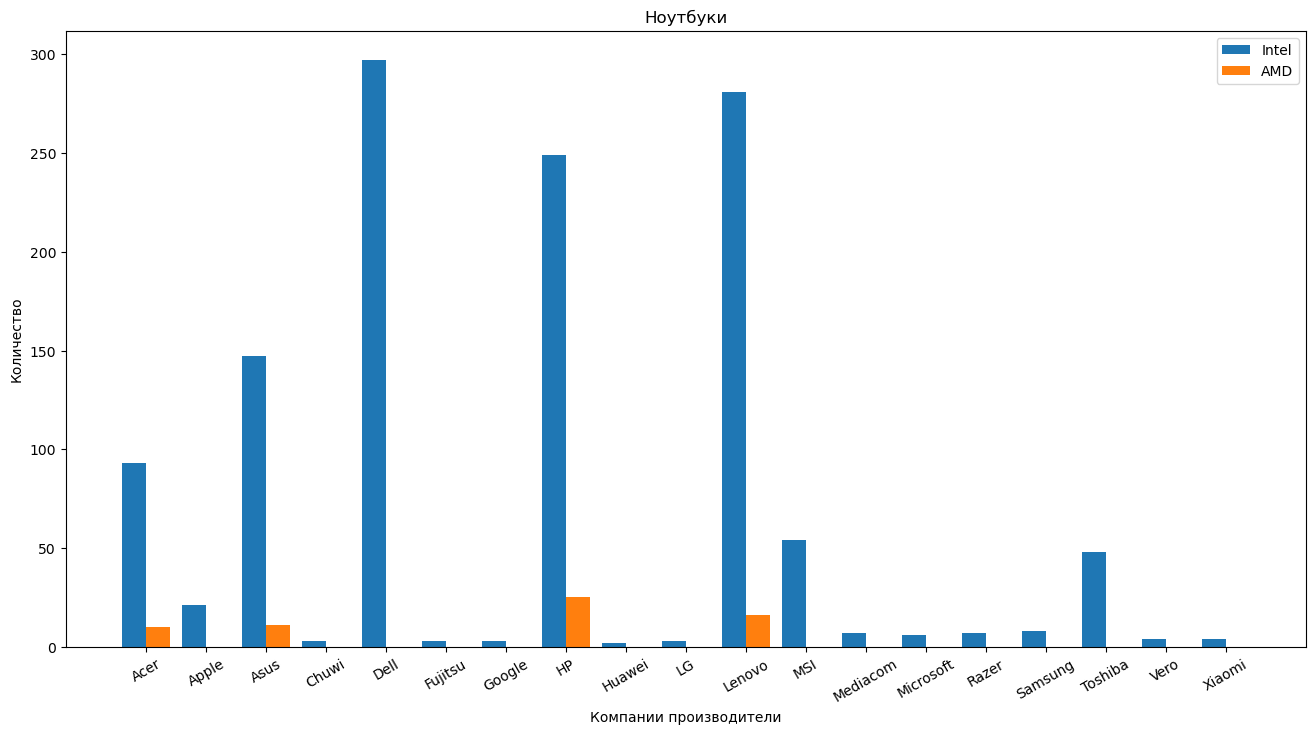

In [16]:
plt.figure(figsize=(16, 8))
n_ticks = data.index
offset = 0.2
w = 0.4

plt.bar(n_ticks-offset, data['Intel'], width=w)
plt.bar(n_ticks+offset, data['AMD'], width=w)
plt.xticks(n_ticks, data['Company'], rotation=30)
plt.title('Ноутбуки')
plt.xlabel('Компании производители')
plt.ylabel('Количество')
plt.legend(['Intel', 'AMD']);

### 3.2 Постройте график в относительных величинах

In [24]:
data = pd.crosstab(index=df['Company'], columns=df[df['Cpu_Company']!='Samsung']['Cpu_Company'], normalize='index').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


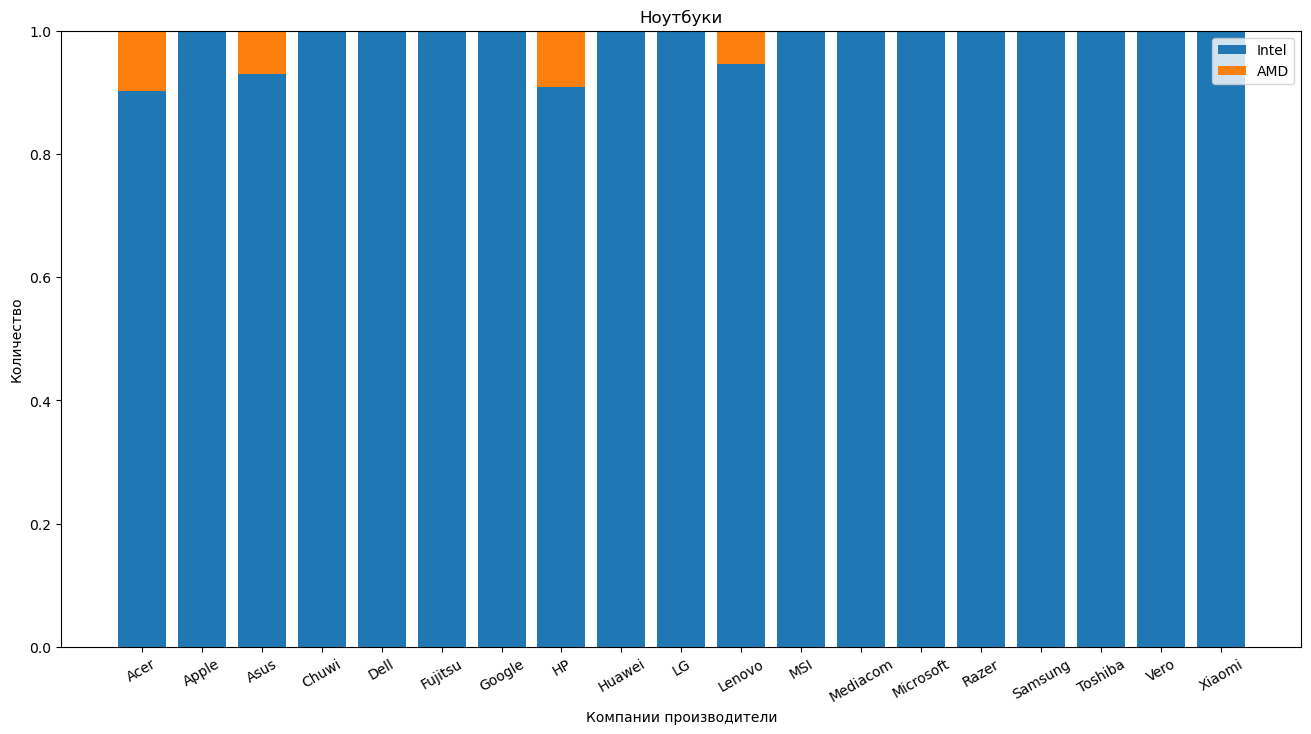

In [26]:
plt.figure(figsize=(16, 8))

plt.bar(data['Company'], data['Intel'])
plt.bar(data['Company'], data['AMD'], bottom=data['Intel'])
plt.xticks(n_ticks, data['Company'], rotation=30)
plt.title('Ноутбуки')
plt.xlabel('Компании производители')
plt.ylabel('Доля ноутбуков')
plt.legend(['Intel', 'AMD']);

## Задание 4.
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

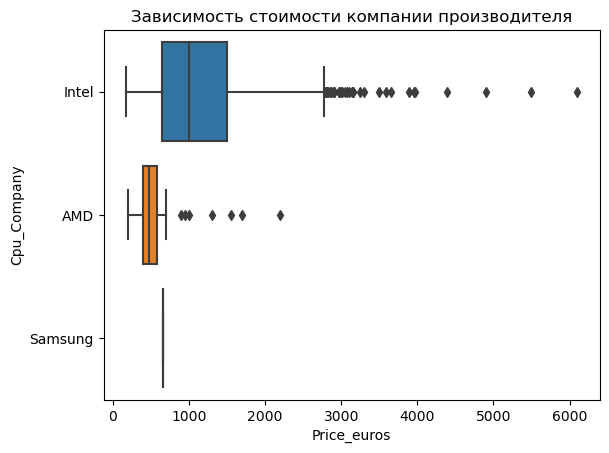

In [32]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'])
plt.title('Зависимость стоимости компании производителя');

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

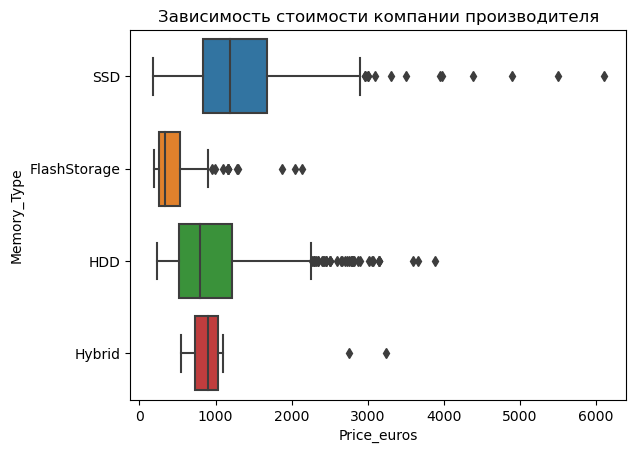

In [33]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'])
plt.title('Зависимость стоимости компании производителя');

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

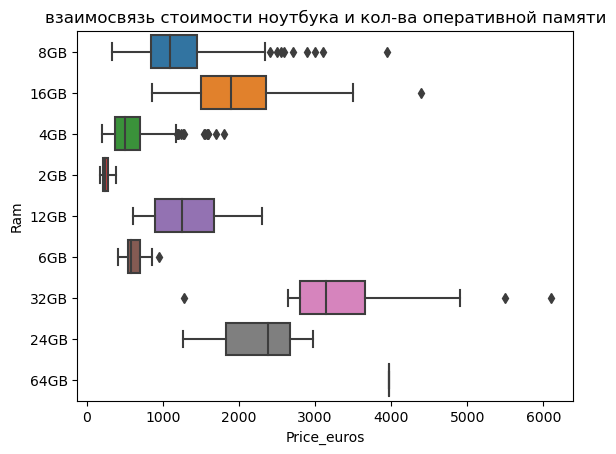

In [35]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'])
plt.title('взаимосвязь стоимости ноутбука и кол-ва оперативной памяти');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

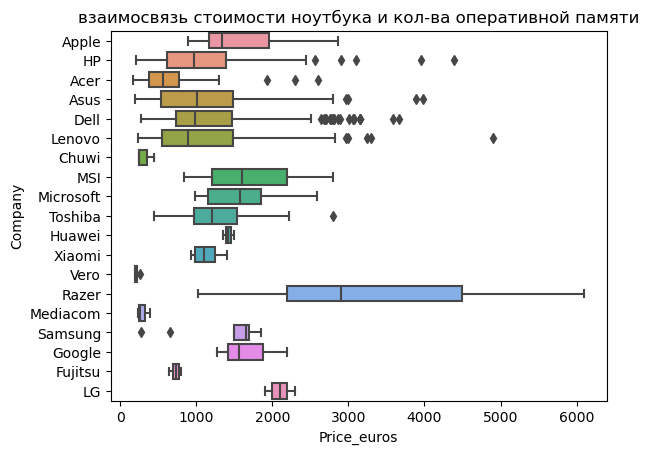

In [38]:
sns.boxplot(x=df['Price_euros'], y=df['Company'])
plt.title('взаимосвязь стоимости ноутбука и кол-ва оперативной памяти');

## Задание 5.
- Постройте матрицу корреляций для таблицы

In [48]:
corr_matrix = df[['Inches', 'Price_euros', 'Weight', 'Memory_Amount']].corr().round(2)
corr_matrix

,Inches,Price_euros,Weight,Memory_Amount
Inches,1.00,0.07,0.83,0.27
Price_euros,0.07,1.00,0.21,-0.13
Weight,0.83,0.21,1.00,0.18
Memory_Amount,0.27,-0.13,0.18,1.00


<Axes: >

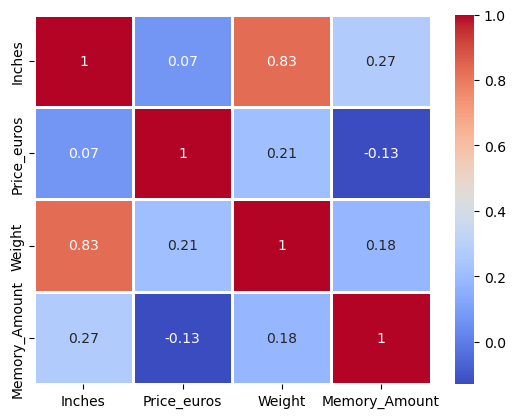

In [50]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=1)